In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from string import letters
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
df=pd.read_csv("RedditShortDemoSurveyCleaned.csv")

In [2]:
df

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.rename(columns={'Please indicate your gender.':'Gender','Please select the category that includes your age.' :'Age','Are you or have you ever been in military service?':'Militarystatus','Do you currently have children under the age of 18 living in your household?':'Children','What best describes your level of education?':'Education','Treated country data':'Country',
'Which one of the following ranges includes your total yearly household income before taxes?':'Incomewithouttaxes','treated subreddit data':'Subredditdata','Are you a dog or a cat person?':'Petperson','If you were a cheese, what cheese would you be?':'Cheeseyouchoose','What is your marital status?': 'Maritalstatus', 'What best describes your employment status?': 'Employementstatus','(For U. S. redditors) In which state do you live?':'USstateulive'
                       })

In [7]:
#EDA for Gender
df.Gender.value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

In [5]:
#categorical variable
#checking missing values
df[df.Gender.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


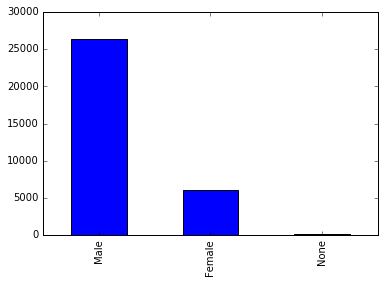

In [6]:
df['Gender'].value_counts().plot(kind='bar')

In [8]:
#Age variable
df.Age.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: Age, dtype: int64

In [9]:
#missing values
df[df.Age.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


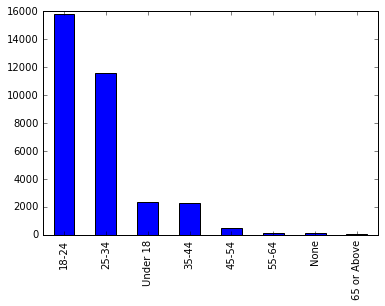

In [10]:
df['Age'].value_counts().plot(kind='bar')

In [11]:
#marital status
df.Maritalstatus.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: Maritalstatus, dtype: int64

In [12]:
#missing
df[df.Maritalstatus.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


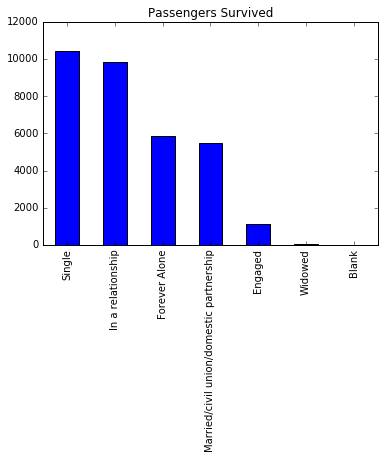

In [13]:
df['Maritalstatus'].value_counts().plot(kind='bar',title="Passengers Survived")

In [14]:
#emp status
df.Employementstatus.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: Employementstatus, dtype: int64

In [15]:
#missing
df[df.Employementstatus.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


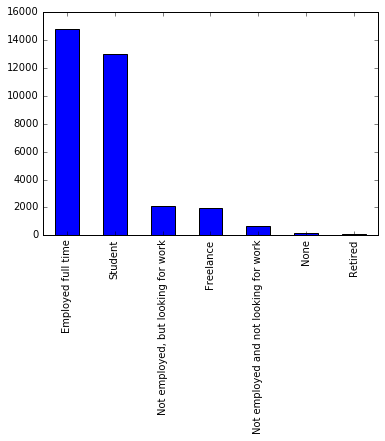

In [16]:
df['Employementstatus'].value_counts().plot(kind='bar')

In [17]:
#Military status
df.Militarystatus.value_counts()

No      30526
Yes      2223
none        5
Name: Militarystatus, dtype: int64

In [18]:
df[df.Militarystatus.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


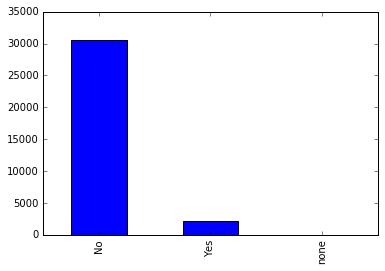

In [19]:
df['Militarystatus'].value_counts().plot(kind='bar')

In [20]:
#children 
df.Children.value_counts()

No      27488
Yes      5047
None      219
Name: Children, dtype: int64

In [21]:
df[df.Children.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


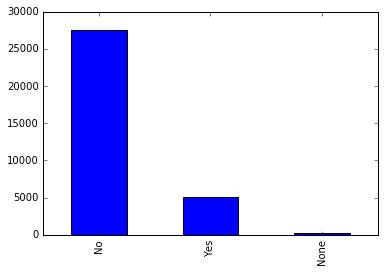

In [22]:
df['Children'].value_counts().plot(kind='bar')

In [23]:
#education
df.Education.value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: Education, dtype: int64

In [24]:
df[df.Education.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


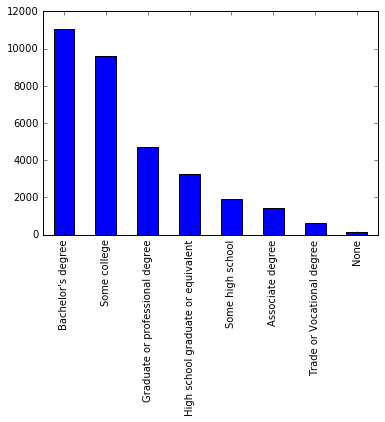

In [25]:
df['Education'].value_counts().plot(kind='bar')

In [26]:
#country
df.Country.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [27]:
df[df.Country.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


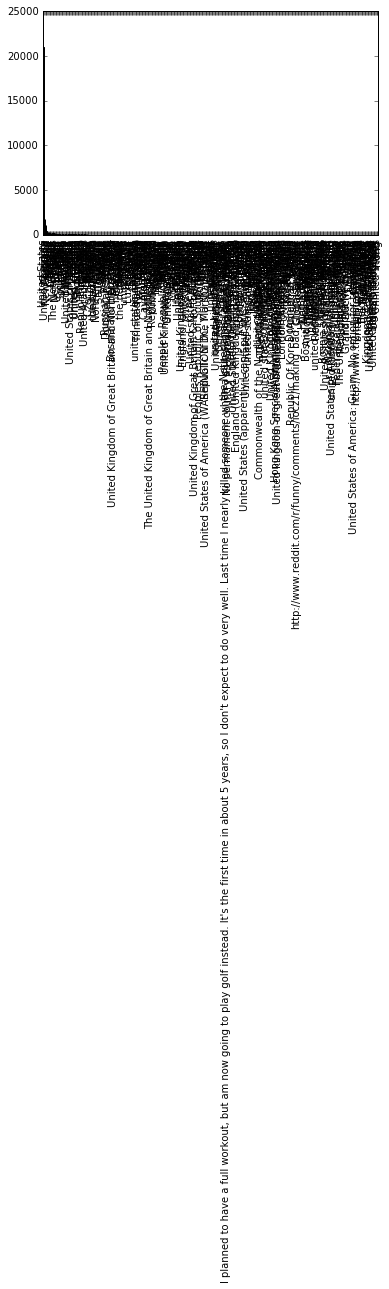

In [28]:
df['Country'].value_counts().plot(kind='bar')

In [30]:
#US state live
df.USstateulive.value_counts()

California        3401
Texas             1541
New York          1418
Illinois           976
Washington         910
Florida            882
Pennsylvania       823
Massachusetts      796
Virginia           729
Ohio               654
New Jersey         552
Michigan           545
North Carolina     511
Maryland           508
Georgia            501
Oregon             466
Minnesota          464
Wisconsin          415
Colorado           410
Arizona            364
Missouri           340
Indiana            313
Connecticut        303
Tennessee          292
Louisiana          196
Utah               181
Kansas             174
Iowa               170
South Carolina     169
Kentucky           168
Alabama            166
Oklahoma           150
Nebraska           118
New Hampshire      111
Nevada             110
Arkansas            99
Washington, DC      98
Maine               85
New Mexico          83
Idaho               78
Alaska              75
Vermont             74
Rhode Island        72
Hawaii     

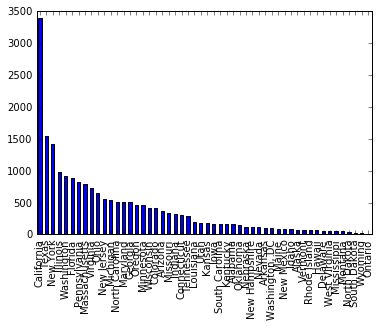

In [31]:
df['USstateulive'].value_counts().plot(kind='bar')

In [32]:
#inc w/o taxes
df.Incomewithouttaxes.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: Incomewithouttaxes, dtype: int64

In [33]:
df[df.Incomewithouttaxes.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


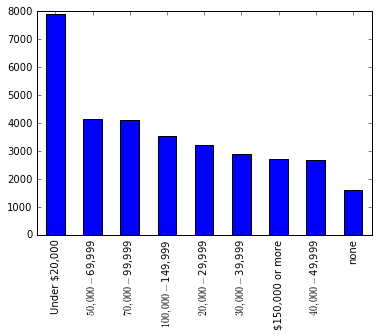

In [34]:
df['Incomewithouttaxes'].value_counts().plot(kind='bar')

In [35]:
#subreddit
df.Subredditdata.value_counts()

askreddit                                        2123
fffffffuuuuuuuuuuuu                              1746
pics                                             1651
trees                                            1311
gaming                                           1207
funny                                            1092
atheism                                           839
askscience                                        779
all                                               647
todayilearned                                     645
starcraft                                         611
iama                                              576
minecraft                                         520
f7u12                                             515
programming                                       501
twoxchromosomes                                   396
science                                           378
truereddit                                        347
wtf                         

In [36]:
df[df.Subredditdata.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN
13,14,Male,18-24,Forever Alone,Student,No,No,Some college,Romania,NaN,"Under $20,000",NaN,I like cats.,Swiss,NaN,NaN,NaN,NaN,NaN,NaN
29,30,Female,18-24,Forever Alone,Student,No,No,Some college,United States,Minnesota,none,NaN,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
52,53,Male,25-34,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United States,Texas,"$70,000 - $99,999",NaN,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
61,62,Male,25-34,Single,Employed full time,Yes,No,Some college,romania,NaN,"$20,000 - $29,999",NaN,I like cats.,Other,NaN,NaN,NaN,NaN,NaN,NaN
75,76,Male,35-44,Single,Freelance,No,No,Some college,United Kingdom,NaN,"$70,000 - $99,999",NaN,I like cats.,Other,NaN,NaN,NaN,NaN,NaN,NaN
79,80,Male,25-34,Single,Employed full time,No,No,Bachelor's degree,United States,Texas,"$40,000 - $49,999",NaN,I like cats.,Brie,NaN,NaN,NaN,NaN,NaN,NaN
89,90,Male,18-24,Single,Student,No,No,Some college,United States,Colorado,"$150,000 or more",NaN,I like cats.,Brie,NaN,NaN,NaN,NaN,NaN,NaN
103,104,Male,25-34,In a relationship,Student,No,No,Bachelor's degree,United States,Massachusetts,"$20,000 - $29,999",NaN,I like dogs.,Goat,NaN,NaN,NaN,NaN,NaN,NaN
162,163,Female,25-34,Single,Student,No,No,Bachelor's degree,United States,Florida,"Under $20,000",NaN,I like turtles.,Goat,NaN,NaN,NaN,NaN,NaN,NaN


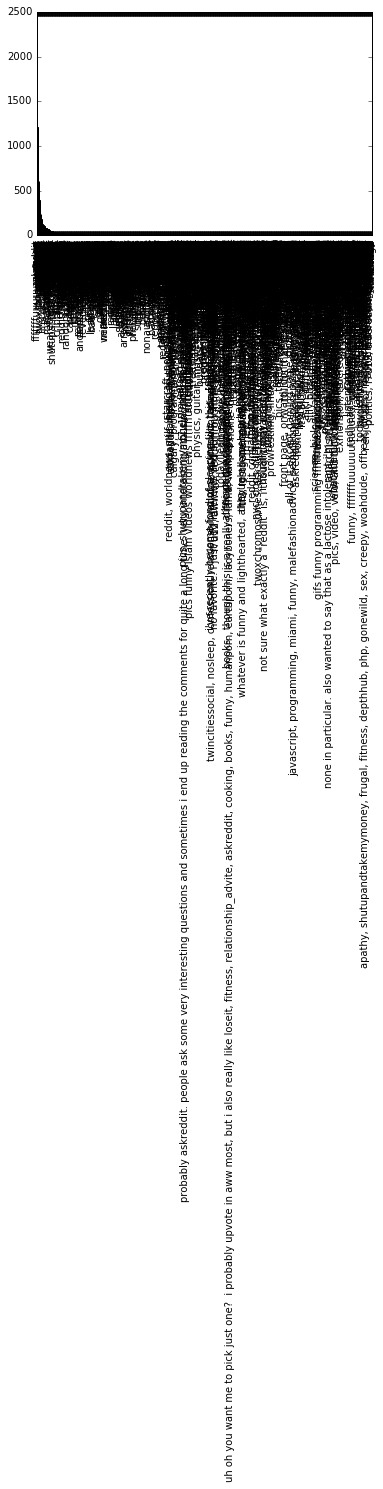

In [37]:
df['Subredditdata'].value_counts().plot(kind='bar')

In [38]:
#petperson
df.Petperson.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   5
askreddit              2
 Reddit.com            1
movies                 1
Name: Petperson, dtype: int64

In [39]:
df[df.Petperson.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
2705,2706,Male,18-24,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United Kingdom,NaN,none,DROP TABLE `users`,NaN,1,7/13/11 15:47,public,NaN,NaN,NaN,NaN
30331,30334,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,Canada,NaN,"$70,000 - $99,999",DROP TABLE USERS,NaN,programming'),7/14/11 12:12,public,NaN,NaN,NaN,NaN


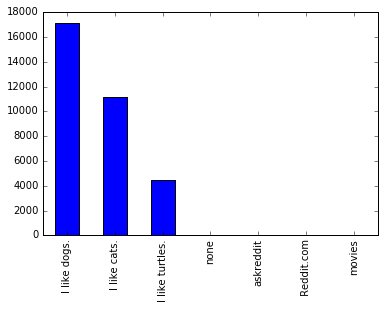

In [40]:
df['Petperson'].value_counts().plot(kind='bar')

In [41]:
#cheesy
df.Cheeseyouchoose.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
none                5
 f7u12              2
1                   1
programming')       1
 awww               1
 Pics               1
Name: Cheeseyouchoose, dtype: int64

In [42]:
df[df.Cheeseyouchoose.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


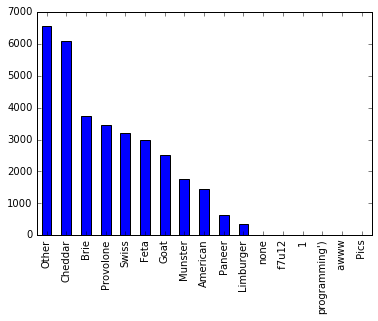

In [43]:
df['Cheeseyouchoose'].value_counts().plot(kind='bar')

In [44]:
#dropping US states
del df['USstateulive']

In [45]:
df

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
del df['Unnamed: 14']
del df['Unnamed: 15']
del df['Unnamed: 16']
del df['Unnamed: 17']
del df['Unnamed: 18']
del df['Unnamed: 19']

In [47]:
#filling missing data
df["Subredditdata"].fillna('askreddit', inplace=True)
df["Petperson"].fillna('I like dogs.', inplace=True)

In [48]:
df

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$70,000 - $99,999",aww,none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,none,python,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",askreddit,I like cats.,Munster


In [49]:
df.Country.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [50]:
cntry=df['Country'][0:] 

In [51]:
cntry

0              United States
1              United States
2              United States
3              United States
4              United States
5              United States
6                    Germany
7              United States
8              United States
9                    Germany
10             United States
11             United States
12             United States
13                   Romania
14             United States
15             United States
16             United States
17            United Kingdom
18       Republic of Ireland
19             United States
20                    France
21            United Kingdom
22                   Germany
23                    Canada
24                   Germany
25             United States
26             United States
27             United States
28             United States
29             United States
                ...         
32724          United States
32725          United States
32726          United States
32727         

In [52]:
df

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$70,000 - $99,999",aww,none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,none,python,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",askreddit,I like cats.,Munster


In [53]:
lg2=cntry.str.rstrip(': Guam. No option for territories :( ')

In [54]:
lg3=lg2.str.rstrip('(Guam) ')

In [55]:
X = pd.DataFrame()
X['Gender'] = df['Gender']
X['Age'] = df['Age']
X['Maritalstatus']=df['Maritalstatus']
X['Employmentstatus']=df['Employementstatus']
X['Country']=df['Country']
X['Education']=df['Education']
X['Incomewithouttaxes']=df['Incomewithouttaxes']
X['Children']=df['Children']
X['Militarystatus'] = df['Militarystatus']

In [56]:
X

,Gender,Age,Maritalstatus,Employmentstatus,Country,Education,Incomewithouttaxes,Children,Militarystatus
0,Male,25-34,Blank,Employed full time,United States,Bachelor's degree,"$150,000 or more",No,none
1,Male,25-34,Blank,Employed full time,United States,Bachelor's degree,"$150,000 or more",No,none
2,Female,18-24,Blank,Freelance,United States,Some college,"Under $20,000",No,none
3,Male,25-34,Blank,Freelance,United States,Bachelor's degree,"$150,000 or more",No,none
4,Female,25-34,Blank,Employed full time,United States,Bachelor's degree,"$70,000 - $99,999",No,none
5,Male,25-34,Married/civil union/domestic partnership,Employed full time,United States,Bachelor's degree,"$150,000 or more",No,No
6,Male,25-34,In a relationship,Employed full time,Germany,Some college,none,No,No
7,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",United States,Bachelor's degree,"$70,000 - $99,999",No,No
8,Male,35-44,Married/civil union/domestic partnership,Employed full time,United States,Bachelor's degree,"$150,000 or more",No,No
9,Male,25-34,In a relationship,Freelance,Germany,Some college,"$70,000 - $99,999",No,No


In [57]:
y = X['Incomewithouttaxes']
X = X.drop(['Incomewithouttaxes'], axis=1)

In [58]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [59]:
describe_categorical(X)

,Gender,Age,Maritalstatus,Employmentstatus,Country,Education,Children,Militarystatus
count,32754,32754,32754,32754,32754,32754,32754,32754
unique,3,8,7,7,440,8,3,3
top,Male,18-24,Single,Employed full time,United States,Bachelor's degree,No,No
freq,26418,15802,10428,14814,20967,11046,27488,30526


In [60]:
categorical_variables = ['Gender','Age', 'Maritalstatus','Employmentstatus','Children',
'Education','Country','Militarystatus']

In [61]:
for variable in categorical_variables:
    X[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [62]:
y

0           $150,000 or more
1           $150,000 or more
2              Under $20,000
3           $150,000 or more
4          $70,000 - $99,999
5           $150,000 or more
6                       none
7          $70,000 - $99,999
8           $150,000 or more
9          $70,000 - $99,999
10             Under $20,000
11         $40,000 - $49,999
12         $50,000 - $69,999
13             Under $20,000
14         $50,000 - $69,999
15             Under $20,000
16         $50,000 - $69,999
17             Under $20,000
18         $40,000 - $49,999
19         $70,000 - $99,999
20             Under $20,000
21       $100,000 - $149,999
22       $100,000 - $149,999
23         $40,000 - $49,999
24          $150,000 or more
25             Under $20,000
26         $50,000 - $69,999
27             Under $20,000
28         $20,000 - $29,999
29                      none
                ...         
32724      $30,000 - $39,999
32725    $100,000 - $149,999
32726      $30,000 - $39,999
32727         

In [63]:
y.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: Incomewithouttaxes, dtype: int64

In [64]:
X.corr(method='pearson', min_periods=1)

,Gender_Female,Gender_Male,Gender_None,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 or Above,Age_None,...,Country_united states :f,Country_united states of America,Country_united states of American,Country_united states of america,Country_usa,Country_venezuela,Country_wales,Militarystatus_No,Militarystatus_Yes,Militarystatus_none
Gender_Female,1.000000,-0.980288,-0.037724,0.047638,-0.032750,-0.027108,0.009537,0.010528,0.017864,-0.008289,...,-0.002653,-0.002653,-0.002653,0.001776,-0.002653,-0.002653,-0.003752,0.074067,-0.074475,0.006736
Gender_Male,-0.980288,1.000000,-0.160452,-0.040098,0.031868,0.027036,-0.008741,-0.009381,-0.020595,-0.067160,...,0.002706,0.002706,0.002706,-0.001582,0.002706,0.002706,0.003827,-0.057709,0.058087,-0.006462
Gender_None,-0.037724,-0.160452,1.000000,-0.035184,0.002427,-0.001313,-0.003439,-0.005148,0.014919,0.381091,...,-0.000434,-0.000434,-0.000434,-0.000868,-0.000434,-0.000434,-0.000614,-0.078142,0.078271,-0.000971
Age_18-24,0.047638,-0.040098,-0.035184,1.000000,-0.713762,-0.262653,-0.120453,-0.063257,-0.041361,-0.050112,...,-0.005335,-0.005335,-0.005335,0.000388,-0.005335,0.005723,0.000275,0.077625,-0.077363,-0.006984
Age_25-34,-0.032750,0.031868,0.002427,-0.713762,1.000000,-0.201115,-0.092232,-0.048436,-0.031670,-0.038371,...,0.007474,0.007474,0.007474,-0.008170,0.007474,-0.004085,-0.005777,-0.041003,0.040479,0.011544
Age_35-44,-0.027108,0.027036,-0.001313,-0.262653,-0.201115,1.000000,-0.033940,-0.017824,-0.011654,-0.014120,...,-0.001503,-0.001503,-0.001503,-0.003007,-0.001503,-0.001503,0.013300,-0.068683,0.068920,-0.003361
Age_45-54,0.009537,-0.008741,-0.003439,-0.120453,-0.092232,-0.033940,1.000000,-0.008174,-0.005345,-0.006475,...,-0.000689,-0.000689,-0.000689,0.021112,-0.000689,-0.000689,-0.000975,-0.042298,0.042418,-0.001542
Age_55-64,0.010528,-0.009381,-0.005148,-0.063257,-0.048436,-0.017824,-0.008174,1.000000,-0.002807,-0.003401,...,-0.000362,-0.000362,-0.000362,-0.000724,-0.000362,-0.000362,-0.000512,-0.039919,0.040000,-0.000810
Age_65 or Above,0.017864,-0.020595,0.014919,-0.041361,-0.031670,-0.011654,-0.005345,-0.002807,1.000000,-0.002223,...,-0.000237,-0.000237,-0.000237,-0.000473,-0.000237,-0.000237,-0.000335,-0.042305,0.042375,-0.000529
Age_None,-0.008289,-0.067160,0.381091,-0.050112,-0.038371,-0.014120,-0.006475,-0.003401,-0.002223,1.000000,...,-0.000287,-0.000287,-0.000287,-0.000574,-0.000287,-0.000287,-0.000406,-0.098419,0.098553,-0.000641


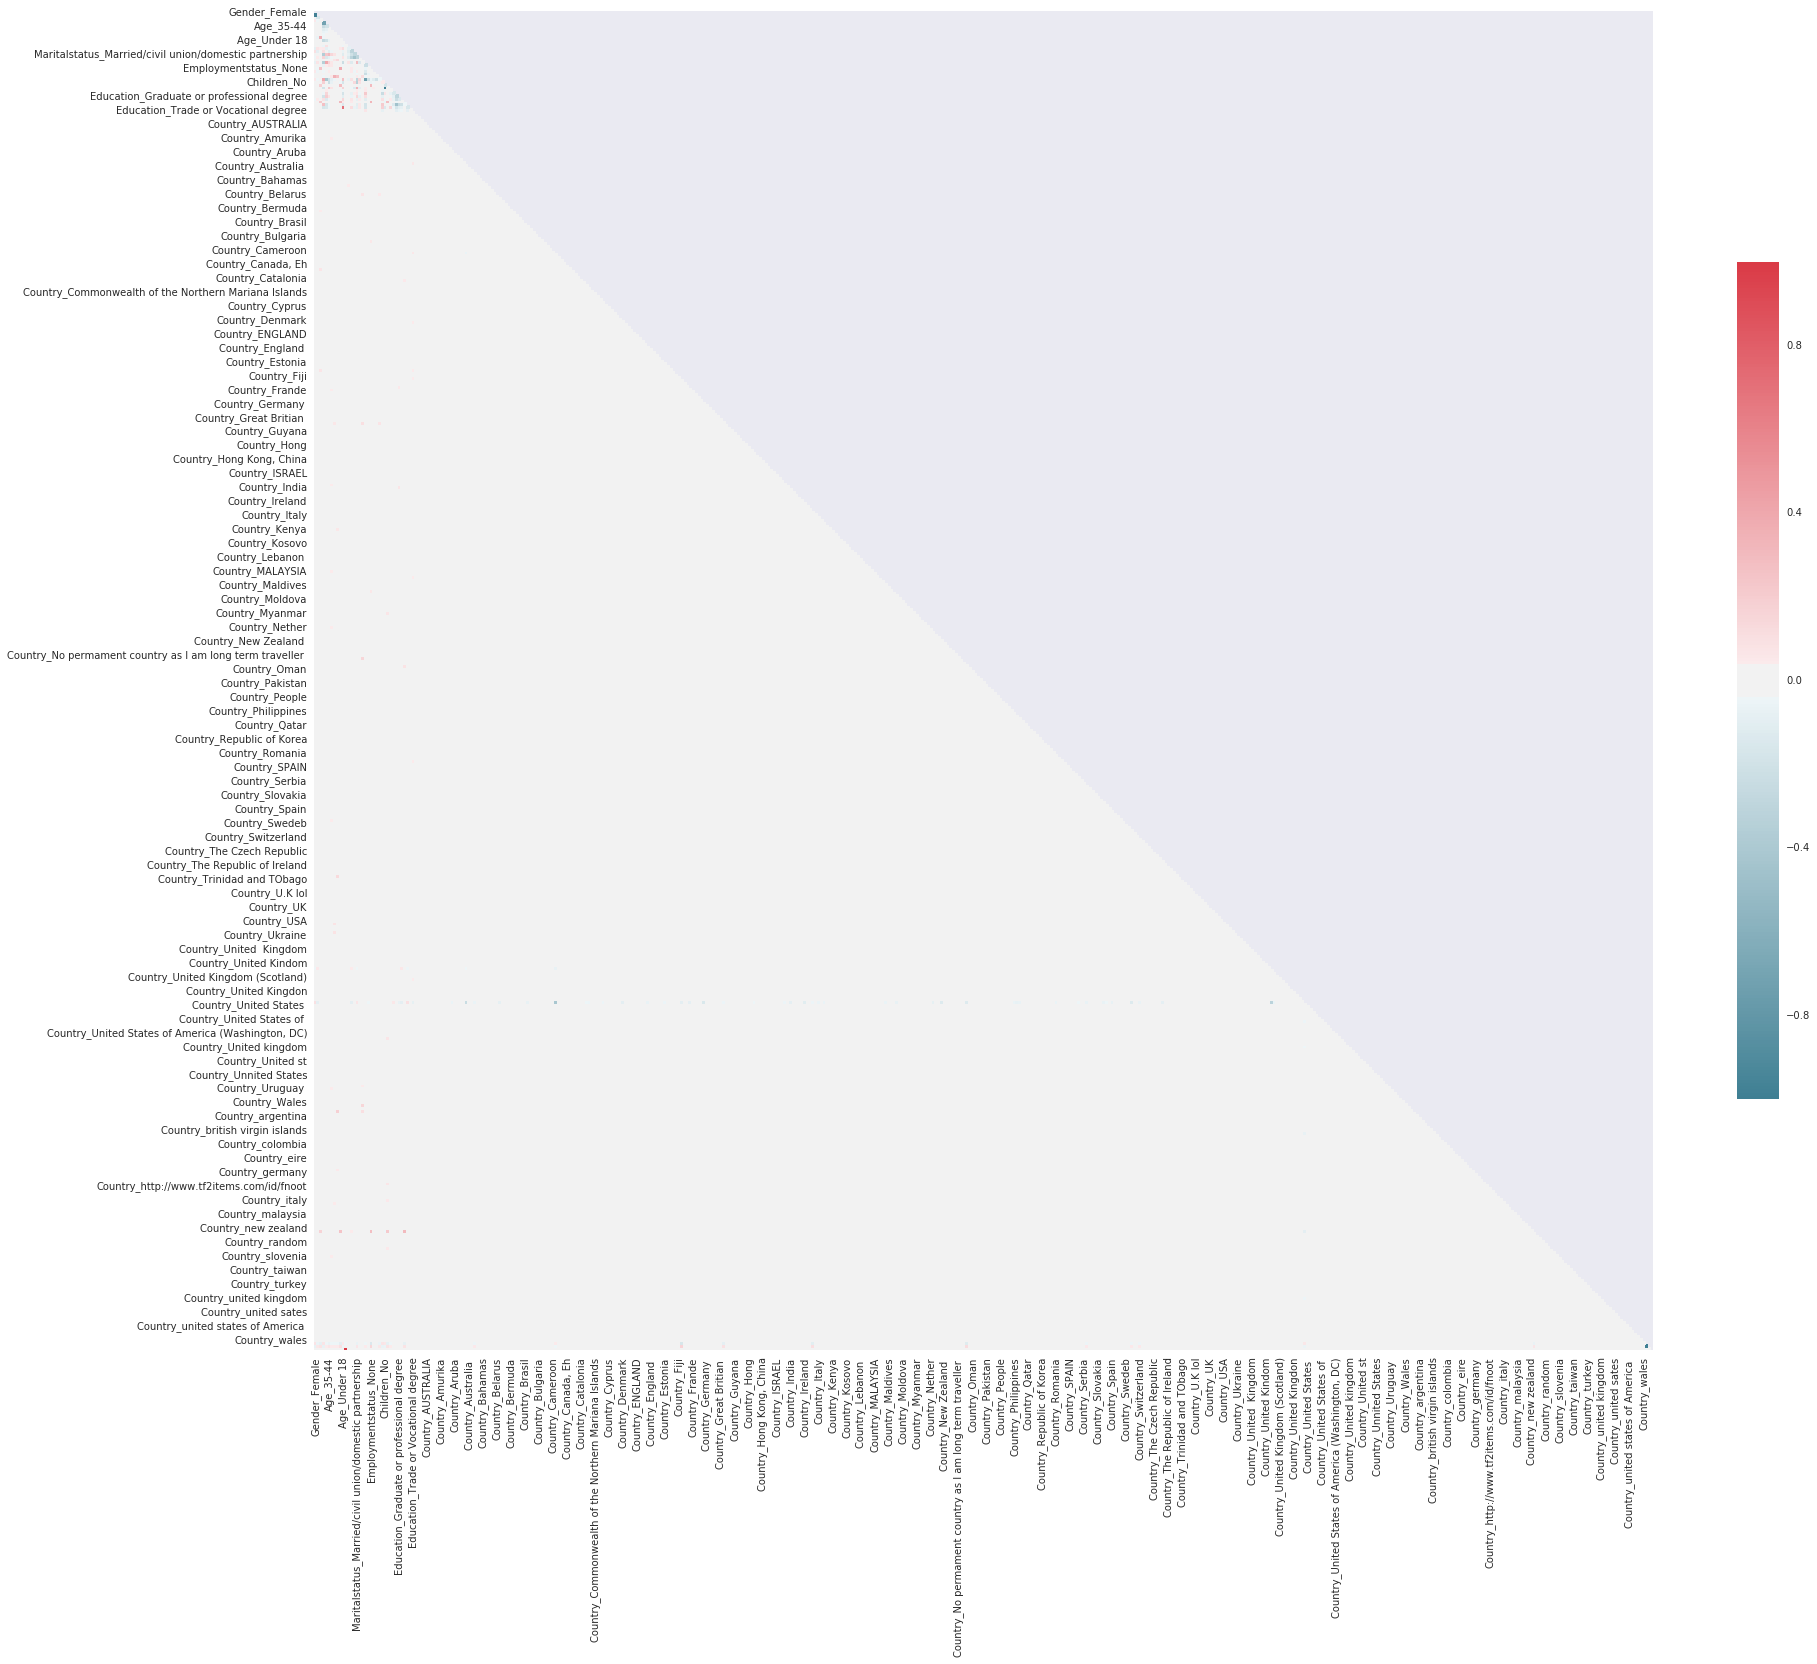

In [65]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Corr = X.corr(method='pearson', min_periods=1)
f, ax = plt.subplots(figsize=(30, 30))

mask = np.zeros_like(Corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Corr, square=True,cmap=cmap, xticklabels=5, yticklabels=5,mask=mask,
            linewidths=0, cbar_kws={"shrink": .5}, ax=ax)

In [66]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [67]:
y.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: Incomewithouttaxes, dtype: int64

In [68]:
y_train.value_counts()

Under $20,000          5537
$50,000 - $69,999      2941
$70,000 - $99,999      2857
$100,000 - $149,999    2442
$20,000 - $29,999      2282
$30,000 - $39,999      2030
$40,000 - $49,999      1878
$150,000 or more       1851
none                   1109
Name: Incomewithouttaxes, dtype: int64

In [69]:
y_test.value_counts()

Under $20,000          2355
$70,000 - $99,999      1244
$50,000 - $69,999      1192
$100,000 - $149,999    1080
$20,000 - $29,999       924
$30,000 - $39,999       874
$150,000 or more        844
$40,000 - $49,999       808
none                    506
Name: Incomewithouttaxes, dtype: int64

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [71]:
model.oob_score_

0.29803288698913943

In [72]:
prediction=model.predict(X_test)

In [73]:
y_predict=model.predict(X_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_predict)

array([[ 156,   99,   37,   34,   25,  165,  213,  345,    6],
       [ 134,  116,   19,   24,   15,   84,  104,  340,    8],
       [  21,   13,  107,  105,   41,  148,   67,  412,   10],
       [  43,   29,   76,   99,   54,  208,   84,  277,    4],
       [  44,   27,   63,   64,   47,  233,  100,  223,    7],
       [  85,   62,   73,   84,   48,  352,  216,  260,   12],
       [ 164,   85,   49,   60,   35,  287,  252,  303,    9],
       [  45,   60,  126,   84,   45,  128,   83, 1749,   35],
       [  37,   37,   15,   19,    9,   38,   38,  284,   29]])

In [74]:
pd.crosstab(y_true, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,"$100,000 - $149,999","$150,000 or more","$20,000 - $29,999","$30,000 - $39,999","$40,000 - $49,999","$50,000 - $69,999","$70,000 - $99,999","Under $20,000",none,All
True,,,,,,,,,,
"$100,000 - $149,999",156,99,37,34,25,165,213,345,6,1080
"$150,000 or more",134,116,19,24,15,84,104,340,8,844
"$20,000 - $29,999",21,13,107,105,41,148,67,412,10,924
"$30,000 - $39,999",43,29,76,99,54,208,84,277,4,874
"$40,000 - $49,999",44,27,63,64,47,233,100,223,7,808
"$50,000 - $69,999",85,62,73,84,48,352,216,260,12,1192
"$70,000 - $99,999",164,85,49,60,35,287,252,303,9,1244
"Under $20,000",45,60,126,84,45,128,83,1749,35,2355
none,37,37,15,19,9,38,38,284,29,506


In [75]:
from sklearn.metrics import classification_report
print classification_report(model.predict(X_test), y_test)

             precision    recall  f1-score   support

$100,000 - $149,999       0.14      0.21      0.17       729
$150,000 or more       0.14      0.22      0.17       528
$20,000 - $29,999       0.12      0.19      0.14       565
$30,000 - $39,999       0.11      0.17      0.14       573
$40,000 - $49,999       0.06      0.15      0.08       319
$50,000 - $69,999       0.30      0.21      0.25      1643
$70,000 - $99,999       0.20      0.22      0.21      1157
Under $20,000       0.74      0.42      0.53      4193
       none       0.06      0.24      0.09       120

avg / total       0.42      0.30      0.34      9827



In [76]:
model.feature_importances_

array([  2.02414855e-02,   2.12601654e-02,   4.17916726e-03,
         3.41414055e-02,   2.65754478e-02,   1.58059460e-02,
         7.76609470e-03,   3.13369521e-03,   1.91594668e-03,
         1.94354372e-03,   8.20310262e-03,   1.56717104e-04,
         1.18155048e-02,   2.38825233e-02,   2.45891955e-02,
         3.01382493e-02,   2.64020591e-02,   1.49984165e-03,
         5.67495896e-02,   1.58751706e-02,   2.86758527e-03,
         9.93238747e-03,   1.66075466e-02,   1.87280618e-03,
         3.92814657e-02,   1.86474321e-02,   3.48058338e-03,
         1.94743968e-02,   1.46237640e-02,   2.77780340e-02,
         2.31561863e-02,   2.11773686e-02,   4.45326352e-03,
         2.70977723e-02,   1.17548404e-02,   1.16974737e-02,
         2.05437179e-04,   0.00000000e+00,   4.69856874e-05,
         1.25219120e-04,   5.05770912e-05,   3.11984369e-04,
         9.80184409e-05,   5.76346954e-05,   1.47828496e-04,
         6.08711154e-05,   3.99537040e-05,   5.82283393e-05,
         3.70263267e-05,

C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


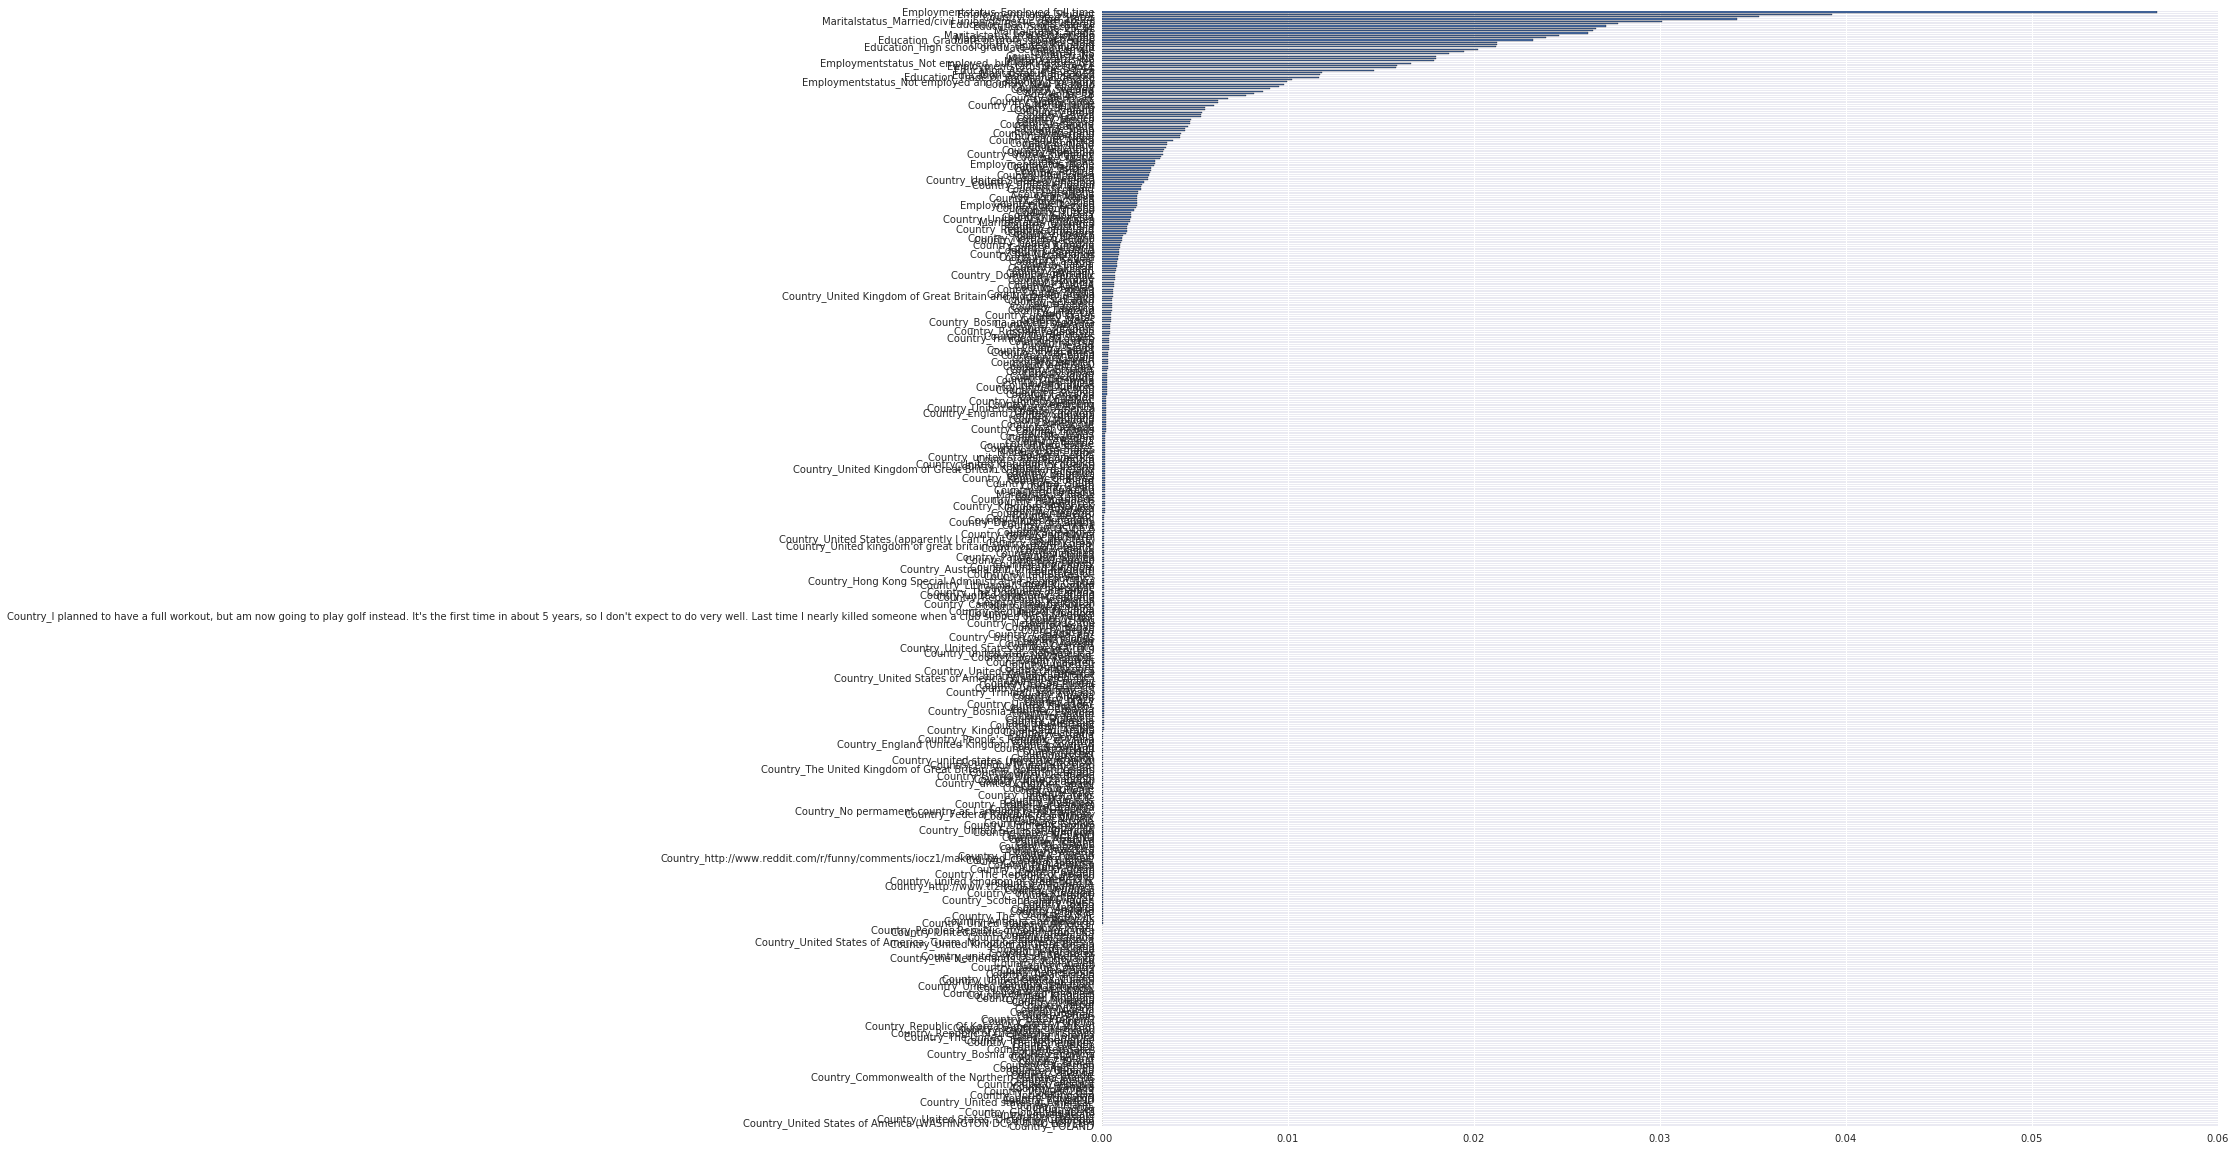

In [77]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(20,20));

In [78]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X_train, y_train)

1 loop, best of 3: 3min 37s per loop


In [79]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

1 loop, best of 3: 2min per loop


In [80]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000]

for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    print trees, "trees"
    Matrix = confusion_matrix(y_true, y_predict)

    print "Confusionmatrix ", Matrix
    results.append(Matrix)

30 trees
Confusionmatrix  [[ 156   99   37   34   25  165  213  345    6]
 [ 134  116   19   24   15   84  104  340    8]
 [  21   13  107  105   41  148   67  412   10]
 [  43   29   76   99   54  208   84  277    4]
 [  44   27   63   64   47  233  100  223    7]
 [  85   62   73   84   48  352  216  260   12]
 [ 164   85   49   60   35  287  252  303    9]
 [  45   60  126   84   45  128   83 1749   35]
 [  37   37   15   19    9   38   38  284   29]]
50 trees
Confusionmatrix  [[ 156   99   37   34   25  165  213  345    6]
 [ 134  116   19   24   15   84  104  340    8]
 [  21   13  107  105   41  148   67  412   10]
 [  43   29   76   99   54  208   84  277    4]
 [  44   27   63   64   47  233  100  223    7]
 [  85   62   73   84   48  352  216  260   12]
 [ 164   85   49   60   35  287  252  303    9]
 [  45   60  126   84   45  128   83 1749   35]
 [  37   37   15   19    9   38   38  284   29]]
100 trees
Confusionmatrix  [[ 156   99   37   34   25  165  213  345    6]
 [ 134 

In [81]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X_train, y_train)
    print max_features, "option"
    Matrix = confusion_matrix(y_true, y_predict)

    print "Confusionmatrix ", Matrix
    results.append(Matrix)

auto option
Confusionmatrix  [[ 156   99   37   34   25  165  213  345    6]
 [ 134  116   19   24   15   84  104  340    8]
 [  21   13  107  105   41  148   67  412   10]
 [  43   29   76   99   54  208   84  277    4]
 [  44   27   63   64   47  233  100  223    7]
 [  85   62   73   84   48  352  216  260   12]
 [ 164   85   49   60   35  287  252  303    9]
 [  45   60  126   84   45  128   83 1749   35]
 [  37   37   15   19    9   38   38  284   29]]
None option
Confusionmatrix  [[ 156   99   37   34   25  165  213  345    6]
 [ 134  116   19   24   15   84  104  340    8]
 [  21   13  107  105   41  148   67  412   10]
 [  43   29   76   99   54  208   84  277    4]
 [  44   27   63   64   47  233  100  223    7]
 [  85   62   73   84   48  352  216  260   12]
 [ 164   85   49   60   35  287  252  303    9]
 [  45   60  126   84   45  128   83 1749   35]
 [  37   37   15   19    9   38   38  284   29]]
sqrt option
Confusionmatrix  [[ 156   99   37   34   25  165  213  345    6]

In [82]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=100, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X_train, y_train)
    print min_samples, "min samples"
    Matrix = confusion_matrix(y_true, y_predict)

    print "Confusionmatrix ", Matrix
    results.append(Matrix)

1 min samples
Confusionmatrix  [[ 156   99   37   34   25  165  213  345    6]
 [ 134  116   19   24   15   84  104  340    8]
 [  21   13  107  105   41  148   67  412   10]
 [  43   29   76   99   54  208   84  277    4]
 [  44   27   63   64   47  233  100  223    7]
 [  85   62   73   84   48  352  216  260   12]
 [ 164   85   49   60   35  287  252  303    9]
 [  45   60  126   84   45  128   83 1749   35]
 [  37   37   15   19    9   38   38  284   29]]
2 min samples
Confusionmatrix  [[ 156   99   37   34   25  165  213  345    6]
 [ 134  116   19   24   15   84  104  340    8]
 [  21   13  107  105   41  148   67  412   10]
 [  43   29   76   99   54  208   84  277    4]
 [  44   27   63   64   47  233  100  223    7]
 [  85   62   73   84   48  352  216  260   12]
 [ 164   85   49   60   35  287  252  303    9]
 [  45   60  126   84   45  128   83 1749   35]
 [  37   37   15   19    9   38   38  284   29]]
3 min samples
Confusionmatrix  [[ 156   99   37   34   25  165  213  345

In [83]:
model = RandomForestClassifier(n_estimators=100, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [84]:
model.oob_score_

0.31430191477297509

In [85]:
y_predict=model.predict(X_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_predict)

array([[ 163,    4,    0,    1,    0,  159,  254,  498,    1],
       [ 124,    9,    0,    0,    0,   68,  121,  522,    0],
       [   3,    0,    0,    0,    0,  188,   52,  681,    0],
       [  17,    0,    0,    1,    0,  251,  102,  503,    0],
       [  14,    1,    0,    1,    0,  281,  103,  407,    1],
       [  60,    0,    0,    1,    0,  376,  221,  534,    0],
       [ 123,    2,    0,    1,    0,  325,  279,  513,    1],
       [   5,    0,    0,    0,    0,  100,   30, 2219,    1],
       [  21,    0,    0,    0,    0,   31,   24,  419,   11]])

In [86]:
pd.crosstab(y_true, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,"$100,000 - $149,999","$150,000 or more","$30,000 - $39,999","$50,000 - $69,999","$70,000 - $99,999","Under $20,000",none,All
True,,,,,,,,
"$100,000 - $149,999",163,4,1,159,254,498,1,1080
"$150,000 or more",124,9,0,68,121,522,0,844
"$20,000 - $29,999",3,0,0,188,52,681,0,924
"$30,000 - $39,999",17,0,1,251,102,503,0,874
"$40,000 - $49,999",14,1,1,281,103,407,1,808
"$50,000 - $69,999",60,0,1,376,221,534,0,1192
"$70,000 - $99,999",123,2,1,325,279,513,1,1244
"Under $20,000",5,0,0,100,30,2219,1,2355
none,21,0,0,31,24,419,11,506
